
###SUMMARY


-> Will be working on Flight_Data dataset

*   Exploratary Data Analysis
*   Deep Learning ANN Model

## Importing the required models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


###Exploratary Data Analysis



In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.drop(["Route","Dep_Time","Arrival_Time","Additional_Info"] , axis=1 , inplace=True)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302


In [8]:
df["Date_of_Journey"].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [9]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey , format="%d/%m/%Y").dt.day

df["Journey_month"] = pd.to_datetime(df.Date_of_Journey , format="%d/%m/%Y").dt.month

df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302,1,3


In [10]:
df.drop(["Date_of_Journey"] , axis=1 ,inplace=True)

In [11]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [12]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [13]:
df.drop(["Duration"], axis = 1, inplace = True)

df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,4,45


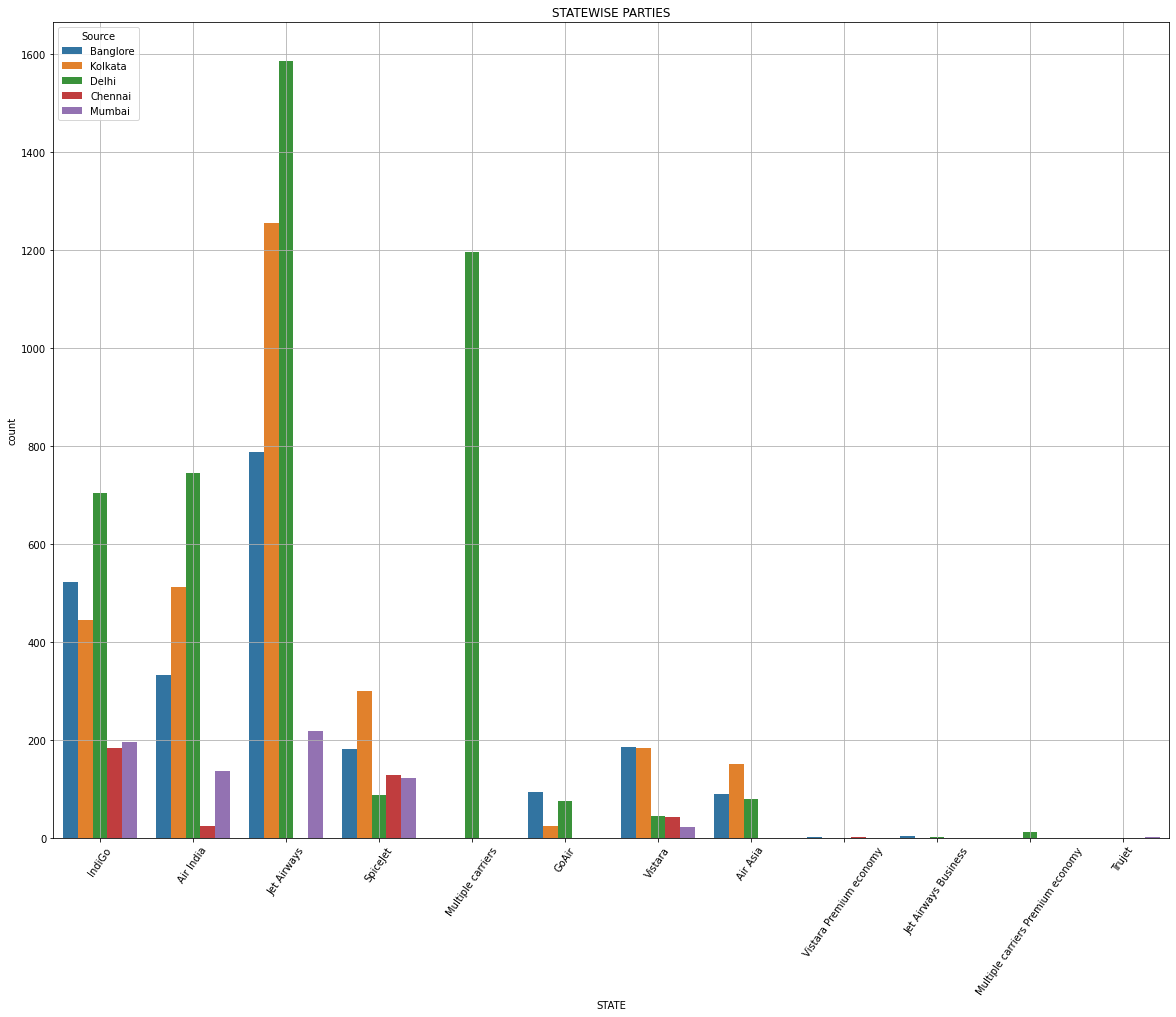

In [14]:
plt.figure(figsize=(20,15))

sns.countplot(data=df, x="Airline",hue="Source")

plt.title("STATEWISE PARTIES")

plt.xlabel("STATE")

plt.xticks(rotation=55)

plt.grid(True)
plt.show()

In [15]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

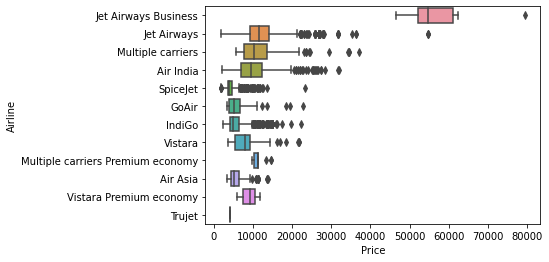

In [16]:
sns.boxplot(y="Airline" , x="Price" , data=df.sort_values("Price", ascending=False ))

###Preprocessing

In [17]:
le = preprocessing.LabelEncoder()

df["Airline"] = le.fit_transform(df["Airline"])
df["Source"] = le.fit_transform(df["Source"])
df["Destination"] = le.fit_transform(df["Destination"])

df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_mins
0,3,0,5,non-stop,3897,24,3,2,50
1,1,3,0,2 stops,7662,1,5,7,25
2,4,2,1,2 stops,13882,9,6,19,0
3,3,3,0,1 stop,6218,12,5,5,25
4,3,0,5,1 stop,13302,1,3,4,45


In [18]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [19]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

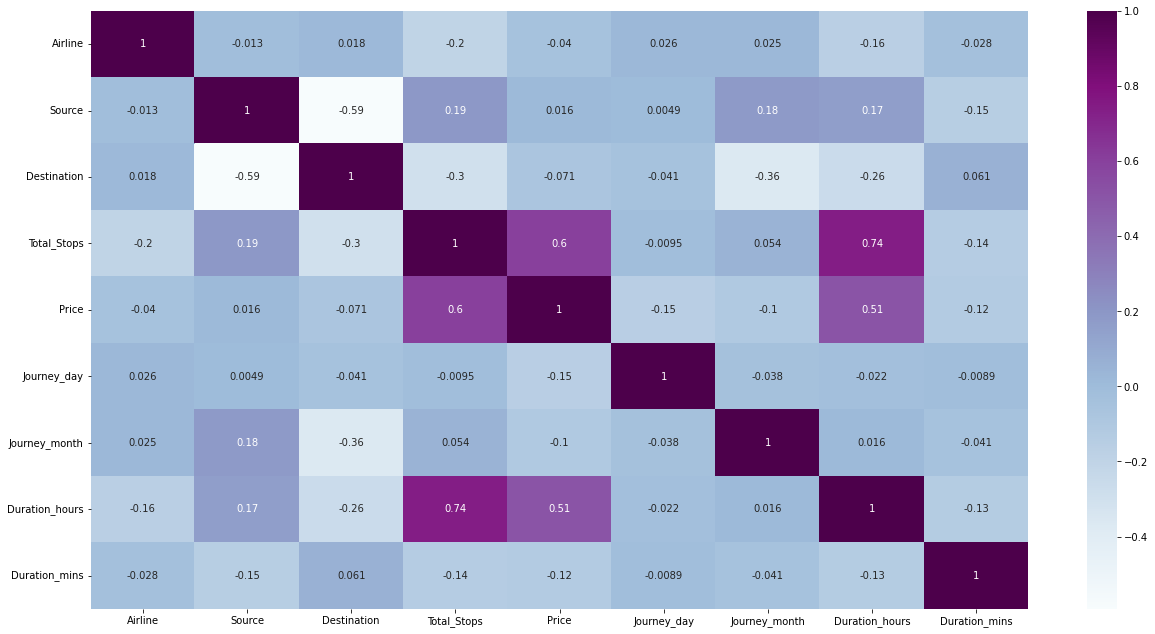

In [20]:
plt.figure(figsize = (21,11))
sns.heatmap(df.corr(), annot = True, cmap = "BuPu")

plt.show()

###Re-Aranging the coloumn



In [21]:
df_prc = df.Price
df_df = df.drop(labels="Price",axis=1)

df = pd.concat([df_df,df_prc], axis=1)

df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Duration_hours,Duration_mins,Price
0,3,0,5,0,24,3,2,50,3897
1,1,3,0,2,1,5,7,25,7662
2,4,2,1,2,9,6,19,0,13882
3,3,3,0,1,12,5,5,25,6218
4,3,0,5,1,1,3,4,45,13302


In [22]:
df.describe()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Duration_hours,Duration_mins,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,0.824190,13.509081,4.708575,10.244898,28.326624,9087.214567
std,2.352090,1.177276,1.474845,0.675229,8.479363,1.164408,8.494916,16.945817,4611.548810
min,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,0.000000,6.000000,3.000000,2.000000,15.000000,5277.000000
50%,4.000000,2.000000,1.000000,1.000000,12.000000,5.000000,8.000000,30.000000,8372.000000
75%,4.000000,3.000000,2.000000,1.000000,21.000000,6.000000,15.000000,45.000000,12373.000000
max,11.000000,4.000000,5.000000,4.000000,27.000000,6.000000,47.000000,55.000000,79512.000000


##Spliting the dataset into train and test

In [23]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [24]:
x

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Duration_hours,Duration_mins
0,3,0,5,0,24,3,2,50
1,1,3,0,2,1,5,7,25
2,4,2,1,2,9,6,19,0
3,3,3,0,1,12,5,5,25
4,3,0,5,1,1,3,4,45
...,...,...,...,...,...,...,...,...
10678,0,3,0,0,9,4,2,30
10679,1,3,0,0,27,4,2,35
10680,4,0,2,0,27,4,3,0
10681,10,0,5,0,1,3,2,40


In [25]:
y


0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

####StandardScaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

##Deep Learning Module

In [28]:
ann = Sequential()

ann.add(Dense(units=20, activation="relu"))
ann.add(Dense(units=10, activation="relu"))
ann.add(Dense(units=10, activation="relu"))
ann.add(Dense(units=2, activation="relu")) 

ann.add(Dense(units=1))

ann.compile(optimizer="adam", loss="mse")

ann.fit(xtrain,ytrain , epochs = 1500 , validation_data= (xtest,ytest))

Epoch 1/1500
234/234 [==============================] - 3s 7ms/step - loss: 90098528.0000 - val_loss: 42567344.0000
Epoch 2/1500
234/234 [==============================] - 1s 4ms/step - loss: 27161724.0000 - val_loss: 21664836.0000
Epoch 3/1500
234/234 [==============================] - 1s 4ms/step - loss: 21611966.0000 - val_loss: 18144646.0000
Epoch 4/1500
234/234 [==============================] - 1s 6ms/step - loss: 19070588.0000 - val_loss: 16166709.0000
Epoch 5/1500
234/234 [==============================] - 1s 6ms/step - loss: 17960080.0000 - val_loss: 15388715.0000
Epoch 6/1500
234/234 [==============================] - 2s 8ms/step - loss: 17449602.0000 - val_loss: 14990918.0000
Epoch 7/1500
234/234 [==============================] - 1s 6ms/step - loss: 17128548.0000 - val_loss: 14660102.0000
Epoch 8/1500
234/234 [==============================] - 1s 5ms/step - loss: 16714635.0000 - val_loss: 14129333.0000
Epoch 9/1500
234/234 [==============================] - 1s 6ms/step - lo

##Plotting the loss graph

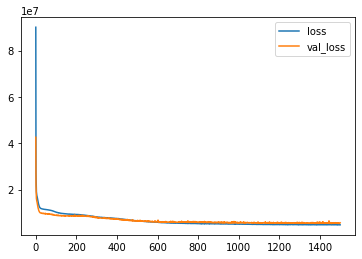

In [29]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [30]:
ann.evaluate(xtrain, ytrain)

234/234 [==============================] - 0s 1ms/step - loss: 4751089.5000


4751089.5

In [31]:
ann.evaluate(xtest, ytest)

101/101 [==============================] - 0s 1ms/step - loss: 5613889.5000


5613889.5

In [32]:
ypred = ann.predict(xtest)

dic = {"Actual Y":ytest, "Predicted Y":ypred.flatten()}
df1 = pd.DataFrame(dic)
df1.head(10)

,Actual Y,Predicted Y
7930,4441,4852.145508
8033,14151,11165.149414
8617,14151,11773.989258
3836,13555,10001.452148
8636,6442,6806.812988
3035,14848,9184.146484
2785,5911,4925.720215
4228,9838,10804.501953
9740,8610,9373.273438
5814,13555,10859.365234


In [33]:
mse = mean_squared_error(ytest, ypred)
print(f"MSE : {mse}")
print(f"RMSE : {np.sqrt(mse)}")

MSE : 5613887.423784158
RMSE : 2369.3643501547326
